In [2]:
import h2o
h2o.init(max_mem_size = 2)            #uses all cores by default
h2o.remove_all()
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,1 min 28 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,4 months and 6 days
H2O_cluster_name:,H2O_from_python_Jikki_yz93ca
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.770 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [3]:
higgs = h2o.import_file('training.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
higgs.head()

EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
100000,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331,s
100001,160.937,68.768,103.235,48.146,-999,-999,-999,3.473,2.078,125.157,0.879,1.414,-999,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999,-999,-999,46.226,2.23358,b
100002,-999,162.172,125.953,35.635,-999,-999,-999,3.148,9.336,197.814,3.776,1.414,-999,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999,-999,-999,44.251,2.34739,b
100003,143.905,81.417,80.943,0.414,-999,-999,-999,3.31,0.414,75.968,2.354,-1.285,-999,22.647,-1.655,0.01,53.321,-0.522,-3.1,31.082,0.06,86.062,0,-999,-999,-999,-999,-999,-999,0,5.44638,b
100004,175.864,16.915,134.805,16.405,-999,-999,-999,3.891,16.405,57.983,1.056,-1.385,-999,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999,-999,-999,-999,-999,-999,0,6.24533,b
100005,89.744,13.55,59.149,116.344,2.636,284.584,-0.54,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.66,0.083414,b
100006,148.754,28.862,107.782,106.13,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.85,1.113,2.409,97.24,0.675,-0.966,38.421,-1.443,294.074,2,123.01,0.864,1.45,56.867,0.131,-2.767,179.877,0.00265331,s
100007,154.916,10.418,94.714,29.169,-999,-999,-999,2.897,1.526,138.178,0.365,-1.305,-999,78.8,0.654,1.547,28.74,0.506,-1.347,22.275,-1.761,187.299,1,30.638,-0.715,-1.724,-999,-999,-999,30.638,0.0186361,s
100008,105.594,50.559,100.989,4.288,-999,-999,-999,2.904,4.288,65.333,0.675,-1.366,-999,39.008,2.433,-2.532,26.325,0.21,1.884,37.791,0.024,129.804,0,-999,-999,-999,-999,-999,-999,0,5.296,b
100009,128.053,88.941,69.272,193.392,-999,-999,-999,1.609,28.859,255.123,0.599,0.538,-999,54.646,-1.533,0.416,32.742,-0.317,-0.636,132.678,0.845,294.741,1,167.735,-2.767,-2.514,-999,-999,-999,167.735,0.00150187,s


In [5]:
higgs.shape

(250000, 33)

In [6]:
higgs_df = higgs.as_data_frame(use_pandas=True)

C:\Users\Jikki\AppData\Roaming\Python\Python37\site-packages\h2o\frame.py:1985: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  "pandas_df = h2o_df.as_data_frame(use_multi_thread=True)\n", H2ODependencyWarning)


In [7]:
higgs_df['Label'].value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [8]:
higgs.describe()

Rows:250000
Cols:33

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
type,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,real,real,real,real,real,enum
mins,100000.0,-999.0,0.0,6.329,0.0,-999.0,-999.0,-999.0,0.208,0.0,46.104,0.047,-1.414,-999.0,20.0,-2.499,-3.142,26.0,-2.505,-3.142,0.109,-3.142,13.678,0.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0.0,0.00150187015894,
mean,224999.5,-49.02307943999997,49.23981927599998,81.18198161200002,57.895961656000004,-708.4206754000003,-601.2370507320001,-709.3566028999999,2.3730998439999986,18.917332444,158.43221704799996,1.4376094319999995,-0.12830470800000005,-708.9851891320001,38.707419128000005,-0.010973048000000006,-0.008171071999999995,46.660207248000006,-0.019507467999999993,0.04354296399999998,41.717234523999956,-0.010119191999999999,209.79717763200003,0.9791760000000003,-348.32956718800006,-399.2543138919999,-399.25978800800004,-692.3812035480003,-709.1216091640005,-709.1186311359999,73.06459138400004,1.646767343718296,
maxs,349999.0,1192.026,690.075,1349.351,2834.999,8.503,4974.979,16.69,5.684,2834.999,1852.462,19.773,1.414,1.0,764.408,2.497,3.142,560.271,2.503,3.142,2842.617,3.142,2003.976,3.0,1120.573,4.499,3.141,721.456,4.5,3.142,1633.433,7.82254254503,
sigma,72168.92798612619,406.3456467028011,35.34488561187187,40.82869053241532,63.65568161833627,454.4805651106835,657.972302113168,453.0198765520874,0.7829111186453122,22.27349375195648,115.70611513348778,0.8447429446613969,1.1935848357750176,453.59672120219045,22.412080666702117,1.2140786460281001,1.8167630443748604,22.06492240495622,1.2649821484873107,1.8166112628154703,32.89469319196888,1.8122227019871906,126.49950571644003,0.9774263053922424,532.9627893583422,489.33828601793925,489.3338833209041,479.87549584539084,453.38462404779636,453.3890172736704,98.0156620082566,1.8751033154986632,
zeros,0,0,3,0,41,6,0,58,0,39,0,0,53,15752,0,0,32,0,35,33,0,44,0,99913,0,26,19,0,9,10,99913,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,100000.0,138.47,51.655,97.827,27.98,0.91,124.711,2.666,3.064,41.928,197.76,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2.0,67.435,2.15,0.444,46.062,1.24,-2.475,113.497,0.00265331133733,s
1,100001.0,160.937,68.768,103.235,48.146,-999.0,-999.0,-999.0,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1.0,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226,2.23358448717,b
2,100002.0,-999.0,162.172,125.953,35.635,-999.0,-999.0,-999.0,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.0,-999.0,-999.0,44.251,2.34738894364,b


In [9]:
train, valid, test = higgs.split_frame([0.6, 0.2], seed = 2019)
higgs_X = higgs.col_names[1: -1]
higgs_y = higgs.col_names[-1]

In [10]:
higgs_model_v1 = H2ODeepLearningEstimator(model_id = 'higgs_v1', epochs = 1, variable_importances = True)
higgs_model_v1.train(higgs_X, higgs_y, training_frame = train, validation_frame = valid)
print(higgs_model_v1)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator : Deep Learning
Model Key: higgs_v1


Status of Neuron Layers: predicting Label, 2-class classification, bernoulli distribution, CrossEntropy loss, 47,002 weights/biases, 571.1 KB, 150,451 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight             weight_rms           mean_bias             bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  ---------------------  ----------  ----------------------  -------------------  --------------------  -------------------
    1        31       Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.00767101502312383   0.009793039411306381   0.0         -0.0062871389109985165  0.11074018478393555  0.38853251100778985   0.10951539874076843
    3        20

In [11]:
var_df = pd.DataFrame(higgs_model_v1.varimp(), columns = ['Variable', 'Relative Importance', 'Scaled Importance', 'Percentage'])
print(var_df.shape)

(31, 4)


In [12]:
var_df.head(10)

,Variable,Relative Importance,Scaled Importance,Percentage
0,Weight,1.000000,1.000000,0.132972
1,DER_mass_vis,0.320020,0.320020,0.042554
2,DER_mass_MMC,0.257763,0.257763,0.034275
3,DER_deltar_tau_lep,0.257665,0.257665,0.034262
4,PRI_jet_leading_eta,0.255826,0.255826,0.034018
5,PRI_jet_leading_pt,0.255284,0.255284,0.033946
6,PRI_jet_leading_phi,0.248672,0.248672,0.033067
7,PRI_jet_num,0.232165,0.232165,0.030872
8,DER_mass_jet_jet,0.230033,0.230033,0.030588
9,DER_prodeta_jet_jet,0.229141,0.229141,0.030469


In [13]:
higgs_v1_df = higgs_model_v1.score_history()
higgs_v1_df

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2025-03-08 10:58:59,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2025-03-08 10:59:04,7.348 sec,3614 obs/sec,0.099617,1,14966.0,0.234568,0.214127,0.756330,...,0.969842,2.903141,0.050897,0.234985,0.215621,0.754367,0.987758,0.970139,2.924518,0.049100
2,,2025-03-08 10:59:28,30.853 sec,5731 obs/sec,1.001438,10,150451.0,0.160838,0.090451,0.885437,...,0.988169,2.903141,0.034465,0.160344,0.089093,0.885631,0.994016,0.986766,2.930379,0.033795


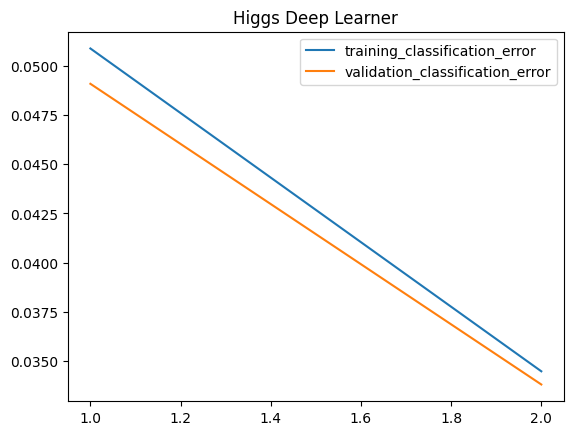

In [14]:
plt.plot(higgs_v1_df['training_classification_error'], label="training_classification_error")
plt.plot(higgs_v1_df['validation_classification_error'], label="validation_classification_error")
plt.title("Higgs Deep Learner")
plt.legend();

In [15]:
pred = higgs_model_v1.predict(test[1:-1]).as_data_frame(use_pandas=True)
test_actual = test.as_data_frame(use_pandas=True)['Label']
(test_actual == pred['predict']).mean()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


C:\Users\Jikki\AppData\Roaming\Python\Python37\site-packages\h2o\frame.py:1985: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  "pandas_df = h2o_df.as_data_frame(use_multi_thread=True)\n", H2ODependencyWarning)


0.9675400232716768

In [16]:
higgs_model_v2 = H2ODeepLearningEstimator(model_id = 'higgs_v2', hidden = [32, 32, 32], epochs = 1000000,
                                           score_validation_samples = 10000, stopping_rounds = 2, stopping_metric = 'misclassification', 
                                           stopping_tolerance = 0.01)
higgs_model_v2.train(higgs_X, higgs_y, training_frame = train, validation_frame = valid)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: higgs_v2


Status of Neuron Layers: predicting Label, 2-class classification, bernoulli distribution, CrossEntropy loss, 3,202 weights/biases, 54.8 KB, 3,801,145 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms             momentum    mean_weight             weight_rms           mean_bias            bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  -------------------  ----------  ----------------------  -------------------  -------------------  -------------------
    1        31       Input      0.0
    2        32       Rectifier  0.0        0.0   0.0   0.047315332452883246  0.1438215970993042   0.0         -0.0003666340072127681  0.23699569702148438  0.18896496785074718  0.5280051231384277
    3        32       Rectifier  0.0        0.0   0.0   0.23891247146707428   0.4019392728805542   0.0         -0.06024906439347433    0.3343329429626465   0.812783399775999    0.5764884948730469
    4        32       Rectifier  0.0        0.0   0.0   0.1643227374904086    0.32624244689941406  0.0         -0.04574049415239756    0.2976447343826294   0.4556722955257539   0.7179708480834961
    5        2        Softmax               0.0   0.0   0.045951776002766564  0.12209314107894897  0.0         -0.01868550677318126    1.3893451690673828   1.0921953832158438   0.17782604694366455

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0009740476495844177
RMSE: 0.031209736454901663
LogLoss: 0.003526629480268314
Mean Per-Class Error: 0.0008080045121901638
AUC: 0.9999958779707518
AUCPR: 0.9999923233739287
Gini: 0.9999917559415037

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.14984402722960768
       b     s     Error    Rate
-----  ----  ----  -------  -------------
b      6548  5     0.0008   (5.0/6553.0)
s      3     3514  0.0009   (3.0/3517.0)
Total  6551  3519  0.0008   (8.0/10070.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.149844     0.998863  339
max f2                       0.00609375   0.999034  354
max f0point5                 0.417802     0.999032  330
max accuracy                 0.21687      0.999206  337
max precision                0.999999     1         0
max recall                   0.00609375   1         354
max specificity              0.999999     1         0
max absolute_mcc             0.149844     0.998253  339
max min_per_class_accuracy   0.149844     0.999147  339
max mean_per_class_accuracy  0.149844     0.999192  339
max tns                      0.999999     6553      0
max fns                      0.999999     2703      0
max fps                      7.72715e-09  6553      399
max tps                      0.00609375   3517      354
max tnr                      0.999999     1         0
max fnr                      0.999999     0.768553  0
max fpr                      7.72715e-09  1         399
max tpr                      0.00609375   1         354

Gains/Lift Table: Avg response rate: 34.93 %, avg score: 34.81 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0100298                   1                  2.86324  2.86324            1                1            1                           1                   0.0287177       0.0287177                  186.324  186.324      

In [17]:
higgs_v2_df = higgs_model_v2.score_history()
higgs_v2_df

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2025-03-08 11:00:57,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2025-03-08 11:00:59,3.051 sec,38316 obs/sec,0.666170,1,100082.0,0.167394,0.098260,0.876710,...,0.986975,2.863236,0.035055,0.175135,0.105590,0.861725,0.991968,0.981569,3.010886,0.038265
2,,2025-03-08 11:01:06,9.823 sec,43520 obs/sec,2.663347,4,400128.0,0.131972,0.062635,0.923369,...,0.993895,2.863236,0.021351,0.146132,0.073561,0.903730,0.995583,0.989195,3.010886,0.028623
3,,2025-03-08 11:01:13,16.599 sec,44396 obs/sec,4.663214,7,700578.0,0.104942,0.039202,0.951544,...,0.997463,2.863236,0.013208,0.110288,0.043999,0.945165,0.998443,0.996537,3.010886,0.014864
4,,2025-03-08 11:01:19,23.933 sec,42466 obs/sec,5.996233,9,900844.0,0.072673,0.021356,0.976762,...,0.999242,2.863236,0.005660,0.080471,0.025195,0.970807,0.999525,0.998994,3.010886,0.006629
5,,2025-03-08 11:01:38,41.573 sec,46601 obs/sec,11.987899,18,1801002.0,0.044484,0.007801,0.991293,...,0.999926,2.863236,0.002085,0.048280,0.008950,0.989492,0.999950,0.999899,3.010886,0.002511
6,,2025-03-08 11:01:43,46.632 sec,48318 obs/sec,13.985316,21,2101084.0,0.032835,0.004766,0.995256,...,0.999963,2.863236,0.001192,0.039435,0.007470,0.992989,0.999915,0.999824,3.010886,0.001707
7,,2025-03-08 11:01:49,53.029 sec,50349 obs/sec,16.648105,25,2501128.0,0.037917,0.005289,0.993674,...,0.999974,2.863236,0.001192,0.049099,0.009106,0.989132,0.999930,0.999856,3.010886,0.002310
8,,2025-03-08 11:01:56,59.319 sec,52030 obs/sec,19.311133,29,2901208.0,0.037617,0.005443,0.993774,...,0.999971,2.863236,0.001291,0.043180,0.008742,0.991594,0.999882,0.999734,3.010886,0.001808
9,,2025-03-08 11:02:01,1 min 4.619 sec,52620 obs/sec,21.308643,32,3201304.0,0.031210,0.003527,0.995714,...,0.999992,2.863236,0.000794,0.038962,0.006038,0.993156,0.999950,0.999893,3.010886,0.001306


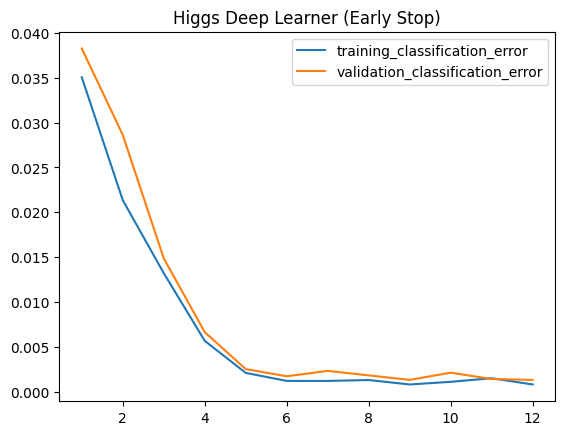

In [18]:
plt.plot(higgs_v2_df['training_classification_error'], label="training_classification_error")
plt.plot(higgs_v2_df['validation_classification_error'], label="validation_classification_error")
plt.title("Higgs Deep Learner (Early Stop)")
plt.legend();

In [19]:
pred = higgs_model_v2.predict(test[1:-1]).as_data_frame(use_pandas=True)
test_actual = test.as_data_frame(use_pandas=True)['Label']
(test_actual == pred['predict']).mean()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


C:\Users\Jikki\AppData\Roaming\Python\Python37\site-packages\h2o\frame.py:1985: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  "pandas_df = h2o_df.as_data_frame(use_multi_thread=True)\n", H2ODependencyWarning)


0.9989768486939774

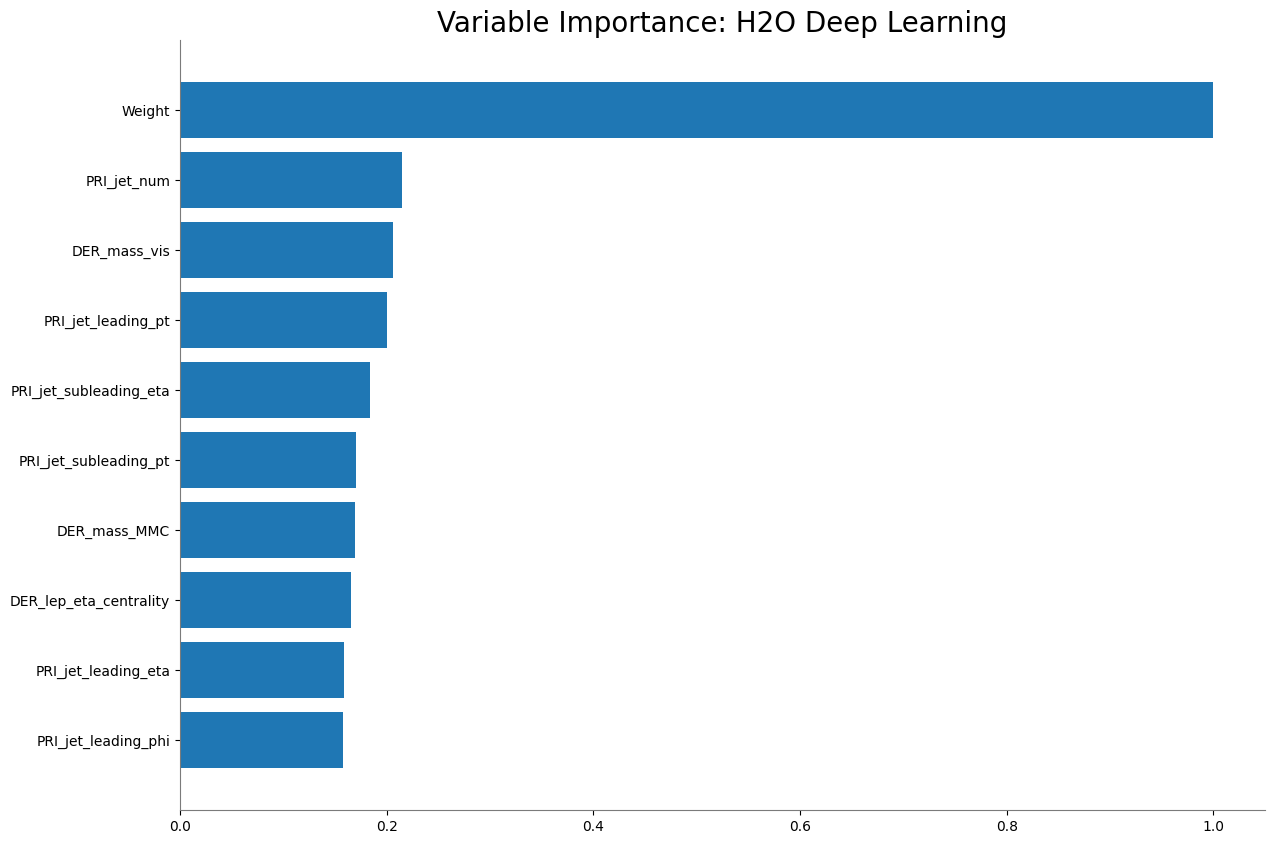

<Figure size 640x480 with 0 Axes>

In [20]:
higgs_model_v2.varimp_plot();

In [21]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, max_runtime_secs=100, seed = 1)
aml.train(higgs_X, higgs_y, training_frame = train, validation_frame = valid)

AutoML progress: |█
11:02:52.21: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20250308_110251


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    345                345                         2.69920e+06            1            15           14.9188       2             705           617.212

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 6.494616938393981e-25
RMSE: 8.058918623732331e-13
LogLoss: 5.239153112887387e-13
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9999999999992358
       b      s      Error    Rate
-----  -----  -----  -------  --------------
b      78928  0      0        (0.0/78928.0)
s      0      41263  0        (0.0/41263.0)
Total  78928  41263  0        (0.0/120191.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value    idx
---------------------------  -----------  -------  -----
max f1                       1            1        0
max f2                       1            1        0
max f0point5                 1            1        0
max accuracy                 1            1        0
max precision                1            1        0
max recall                   1            1        0
max specificity              1            1        0
max absolute_mcc             1            1        0
max min_per_class_accuracy   1            1        0
max mean_per_class_accuracy  1            1        0
max tns                      1            78928    0
max fns                      1            0        0
max fps                      1.37797e-14  78928    399
max tps                      1            41263    0
max tnr                      1            1        0
max fnr                      1            0        0
max fpr                      1.37797e-14  1        399
max tpr                      1            1        0

Gains/Lift Table: Avg response rate: 34.33 %, avg score: 34.33 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.010034                    1                  2.9128   2.9128             1                1            1                           1                   0.0292272       0.0292272                  191.28   191.28             0.0292272
2        0.0200181                   1                  2.9128   2.9128             1                1            1                           1                   0.0290817       0.0583089                  191.28   191.28             0.0583089
3        0.0300272                   1                  2.9128   2.9128             1                1            1                           1                   0.0291544       0.0874633                  191.28   191.28             0.0874633
4        0.0400196                   1                  2.9128   2.9128             1                1            1                           1                   0.029106        0.116569                   191.28   191.28             0.116569
5        0.0500121                   1                  2.9128   2.9128             1                1            1                           1                   0.029106        0.145675                   191.28   191.28           

In [25]:
aml.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_1_AutoML_1_20250222_141708,1,3.01509e-12,1,0,6.66596e-12,4.4435e-23
GLM_1_AutoML_1_20250222_141708,0.996583,0.0789001,0.98777,0.0200877,0.145067,0.0210443


AutoML has built 5 models inlcuding GLM, DRF (Distributed Random Forest) and XRT (Extremely Randomized Trees) and two stacked ensemble models (the 2nd and 3rd) and the best model is XRT.

It turns out, my proud deep learning models are not even on the leaderboard.